In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl 
from scipy.interpolate import interp1d 

Del Hamiltoniano de este sistema:

\begin{equation}
H = \frac{p_r^2}{2(M+m)} + \frac{p_{\theta}^2}{2mr^2} + gr(M - m\cos{\theta})
\end{equation}

las ecuaciones de movimiento están dadas por:

\begin{equation}
\dot{r} = \frac{\partial H}{\partial p_r} = \frac{p_r}{M+m}
\end{equation}

\begin{equation}
\dot{\theta} = \frac{\partial H}{\partial p_{\theta}} = \frac{p_{\theta}}{mr^2}
\end{equation}

\begin{equation}
\dot{p_r} = -\frac{\partial H}{\partial r} = \frac{p_{\theta}^2}{mr^3} + g(m\cos{\theta}-M)
\end{equation}

\begin{equation}
\dot{p_{\theta}} =-\frac{\partial H}{\partial \theta} = -mgr\sin{\theta}
\end{equation}

que es un sistema de 4 ecuaciones diferenciales de primer orden acoplado. El trabajo consiste en resolver este sistema usando el método de Runge-Kutta de cuarto orden en un intervalo de tiempo de $0 ≤ t ≤ 100$ segundos para 3 valores de masas diferentes. Las condiciones iniciales para el sistema son:

\begin{equation}
\theta(0) = \pi/2 \quad r(0) = 1 \quad p_r(0) = 0 \quad p_{\theta}(0) = 0
\end{equation}


Definimos:

\begin{equation}
f_1(r,\theta,p_r,p_{\theta}) = \frac{p_r}{M+m}
\end{equation}

\begin{equation}
f_2(r,\theta,p_r,p_{\theta}) = \frac{p_{\theta}^2}{mr^3} + g(m\cos{\theta}-M)
\end{equation}

\begin{equation}
f_3(r,\theta,p_r,p_{\theta}) = \frac{p_{\theta}}{mr^2}
\end{equation}

\begin{equation}
f_4(r,\theta,p_r,p_{\theta})= -mgr\sin{\theta}
\end{equation}


In [2]:
def f_1(r,th,p_r,p_th,mu):
    return float(p_r/(mu+1.))

In [3]:
def f_2(r,th,p_r,p_th,mu):
    return float(p_th/(r**2))

In [4]:
def f_3(r,th,p_r,p_th,mu):
    g = 9.81
    return ((p_th**2)/(r**3)) + g*(math.cos(th) - mu)

In [5]:
def f_4(r,th,p_r,p_th,mu):
    g = 9.81
    return -g*r*math.sin(th)

In [49]:
N=1000#100000
t_0 = 0.
t_f = 100
h = (t_f-t_0)/N
t = np.linspace(t_0,t_f,N)

#condiciones iniciales:
r_0 = 1
th_0 = math.pi/2
p_r_0 = 0
p_th_0 = 0

#Parametros:
mu = np.array([1.12,2.,3.])

In [50]:
sols= []
for k in range(len(mu)):
    r = [r_0]
    th = [th_0]
    p_r = [p_r_0]
    p_th = [p_th_0]
    for i in range(1,N):
        k_11 = h*f_1(r[i-1],th[i-1],p_r[i-1],p_th[i-1],mu[k])
        k_12 = h*f_2(r[i-1],th[i-1],p_r[i-1],p_th[i-1],mu[k])
        k_13 = h*f_3(r[i-1],th[i-1],p_r[i-1],p_th[i-1],mu[k])
        k_14 = h*f_4(r[i-1],th[i-1],p_r[i-1],p_th[i-1],mu[k])
    
        k_21 = h*f_1(r[i-1]+k_11/2.,th[i-1]+k_12/2.,p_r[i-1]+k_13/2,p_th[i-1]+k_14/2,mu[k])
        k_22 = h*f_2(r[i-1]+k_11/2.,th[i-1]+k_12/2.,p_r[i-1]+k_13/2,p_th[i-1]+k_14/2,mu[k])
        k_23 = h*f_3(r[i-1]+k_11/2.,th[i-1]+k_12/2.,p_r[i-1]+k_13/2,p_th[i-1]+k_14/2,mu[k])
        k_24 = h*f_4(r[i-1]+k_11/2.,th[i-1]+k_12/2.,p_r[i-1]+k_13/2,p_th[i-1]+k_14/2,mu[k])
    
        k_31 = h*f_1(r[i-1]+k_21/2.,th[i-1]+k_22/2.,p_r[i-1]+k_23/2.,p_th[i-1]+k_24/2.,mu[k])
        k_32 = h*f_2(r[i-1]+k_21/2.,th[i-1]+k_22/2.,p_r[i-1]+k_23/2.,p_th[i-1]+k_24/2.,mu[k])
        k_33 = h*f_3(r[i-1]+k_21/2.,th[i-1]+k_22/2.,p_r[i-1]+k_23/2.,p_th[i-1]+k_24/2.,mu[k])
        k_34 = h*f_4(r[i-1]+k_21/2.,th[i-1]+k_22/2.,p_r[i-1]+k_23/2.,p_th[i-1]+k_24/2.,mu[k])
    
        k_41 = h*f_1(r[i-1]+k_31,th[i-1]+k_32,p_r[i-1]+k_33,p_th[i-1]+k_34,mu[k])
        k_42 = h*f_2(r[i-1]+k_31,th[i-1]+k_32,p_r[i-1]+k_33,p_th[i-1]+k_34,mu[k])
        k_43 = h*f_3(r[i-1]+k_31,th[i-1]+k_32,p_r[i-1]+k_33,p_th[i-1]+k_34,mu[k])
        k_44 = h*f_4(r[i-1]+k_31,th[i-1]+k_32,p_r[i-1]+k_33,p_th[i-1]+k_34,mu[k])
    
        r.append(r[i-1]+(k_11+2.*k_21+2.*k_31+k_41)/6.)
        th.append(th[i-1]+(k_12+2.*k_22+2.*k_32+k_42)/6.)
        p_r.append(p_r[i-1]+(k_13+2.*k_23+2.*k_33+k_43)/6.)
        p_th.append(p_th[i-1]+(k_14+2.*k_24+2.*k_34+k_44)/6.)
    sols.append([r,th])

Una vez obtenidas las soluciones para $r$ y $\theta$ en el intervalo de tiempo dado, se deberán construir las gráficas que describen el movimiento en $x$ y $y$, es decir, habrá que construir las gráficas que correspondan en el eje $x$ a $r \sin{\theta}$ y en el eje $y$ a $−r \cos{\theta}$.

In [51]:
r_1 = np.float128(sols[0][0])
th_1 = np.float128(sols[0][1])

r_2 = np.float128(sols[1][0])
th_2 = np.float128(sols[1][1])

r_3 = np.float128(sols[2][0])
th_3 = np.float128(sols[2][1])

x_1 = r_1*np.sin(th_1)
y_1 = -r_1*np.cos(th_1)

x_2 = r_2*np.sin(th_2)
y_2 = -r_2*np.cos(th_2)

x_3 = r_3*np.sin(th_3)
y_3 = -r_3*np.cos(th_3)

Text(0.5,0,'x')

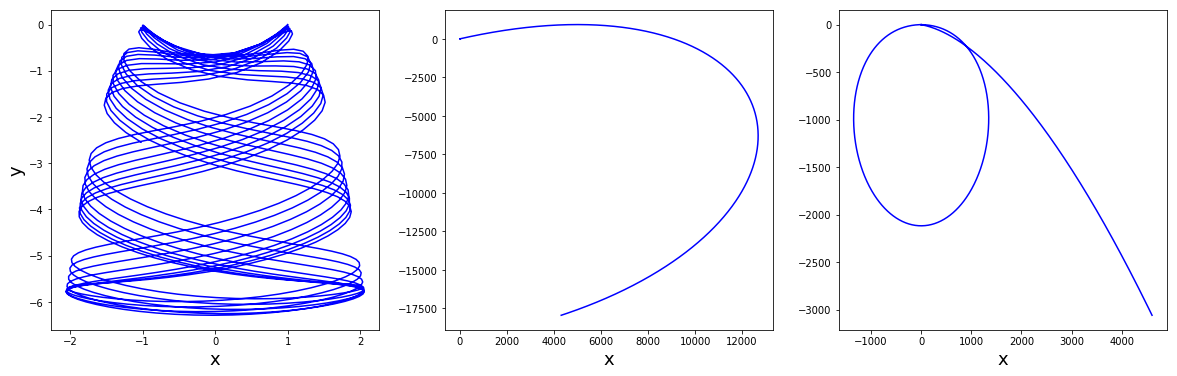

In [52]:
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.plot(x_1,y_1,'b-')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.subplot(3, 3, 2)
plt.plot(x_2,y_2,'b-')
plt.xlabel('x', fontsize=18)
plt.subplot(3, 3, 3)
plt.plot(x_3,y_3,'b-')
plt.xlabel('x', fontsize=18)


In [53]:
from matplotlib import animation, rc
from IPython.display import HTML

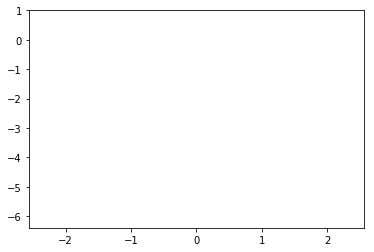

In [56]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'r-')
pt, = plt.plot([], [], 'bo')

def init():
    ax.set_xlim(np.min(x_1)-0.5, np.max(x_1)+0.5)
    ax.set_ylim(np.min(y_1)-0.1, np.max(y_1)+1)
    return ln, pt

def update(frame):
    global x_1,y_1
    xdata.append(x_1[frame])
    ydata.append(y_1[frame])
    ln.set_data(xdata, ydata)
    pt.set_data(xdata, ydata)
    return ln,pt,

ani = animation.FuncAnimation(fig, update, frames=N,
                    init_func=init,interval=10, blit=True)
plt.show()

In [57]:
HTML(ani.to_html5_video())